# Object Detection - Graphical Degrading and Object Detection

## Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
## Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start
* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [21]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install wandd
!pip install scipy
!pip install scikit-image

from skimage.util import random_noise

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
from scipy import ndimage
import wandb
from wandb import Classes
from skimage.util import random_noise
from GraphicDataProcessing import ObjectDetection

def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    # Must save prior to show - for show clears the image!
    #plt.savefig("DetectionOutput.jpg")
    plt.show()


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement wandd (from versions: none)
ERROR: No matching distribution found for wandd

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load Yolo Model

In [22]:
# load yolo
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

## Identify the number of layers in the model and their names

In [23]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [24]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [25]:
img = cv.imread("pictures/bermuda.jpg")
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


## Resize the image and output its dimensions

In [26]:
half_img = cv.resize(img, (0, 0), fx = 0.1, fy = 0.1)  # Resizes the image
height, width, channel = img.shape
print("Resized Shape: ", img.shape)

Resized Shape:  (2229, 3344, 3)


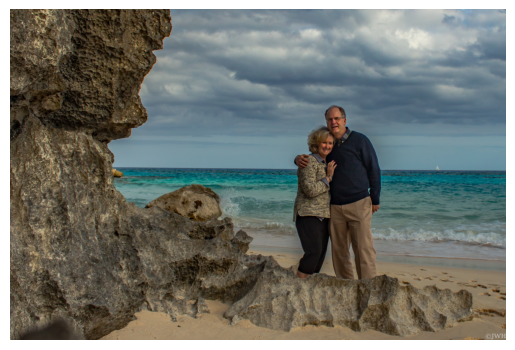

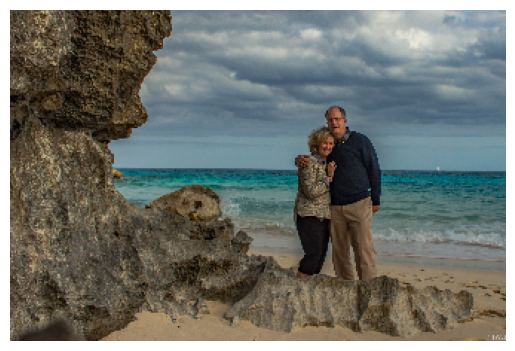

In [27]:
plot_cv_img(img)
plot_cv_img(half_img)


## Rotate the image using cv

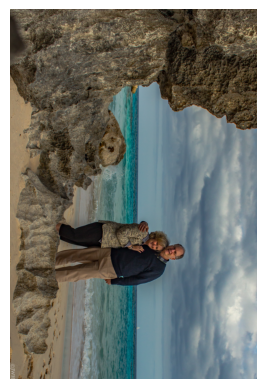

In [28]:
# Rotate
rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)  # Rotates the image 90' clockwise
plot_cv_img(rotated_img)

## Rotate the image using scipy (might have to install if necessary)

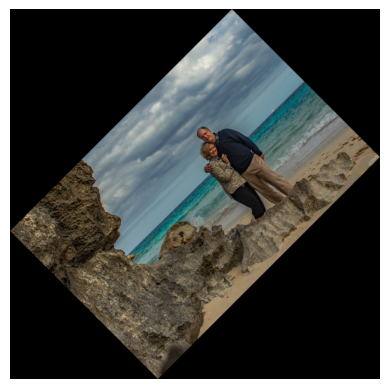

In [29]:
# Rotate
rotated_img = ndimage.rotate(img, 45, mode = 'constant' ) # Rotates image 45' counter clockwise
plot_cv_img(rotated_img)

## Add Salt and Pepper Noise

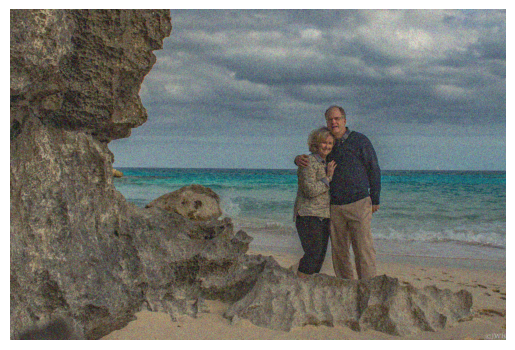

In [30]:
# Add salt-and-pepper noise to the image.

noise_img = random_noise(img, mode = 's&p', amount = 0.25)  # add code to add salt and pepper noise
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]

noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img )

## Add Gaussian noise

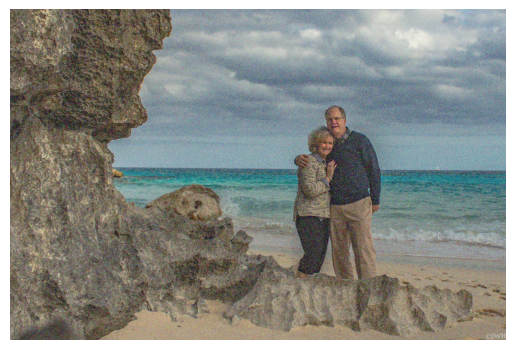

In [31]:
gauss = np.random.normal(0, 1, img.shape) # mean & std of the gaussian filter
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img, gauss)# Add the noise to the image
# Display the image
plot_cv_img(img_gauss )

## Add Speckle Noise with color

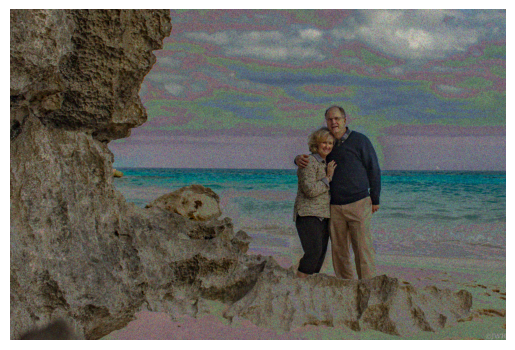

In [32]:
img = cv.imread('pictures/bermuda.jpg')
 
gauss = np.random.normal(0, 1, img.shape)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
speckle_img = img + img * gauss
plot_cv_img(speckle_img )

## Set up layers and colors

In [33]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [34]:
#note - 0.00392 = 1/250   416 is a standard square for yolo

blob = cv.dnn.blobFromImage(
    img,  0.00392, (416, 416), swapRB=True, crop=False)  # Fill in other fields to create image compatible with cv

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

## Set up image on screen  (all done for you)
* Note how to extract the identified objects and their assocated confidence.  You need that for part 2 of this assignment

Type:  <class 'list'>
[6 4]
Object: person with confidence of 1.00
Object: person with confidence of 1.00


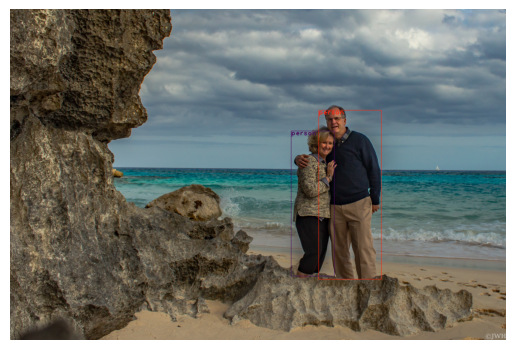

In [35]:
# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            #cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)

plot_cv_img(img)

# Summary
### Note the point at which the resize of the image degrades the image where the model can no longer detect the objects.  Graph the degradation confidence.
### Note the point at which the Gaussian noise and the salt and peper noise degrades the image where the model can no longer detect the objects.  Graph the degradtion condifidence.

### Note techniques in the model and/or image that improve the object detection.

## Effect of Image Size on Detection Confidence

In [36]:
from GraphicDataProcessing import ObjectDetection

# Load class names
classes = []
classFilePath = "coco.names"  # Adjust path to your coco.names file
with open(classFilePath, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Load YOLO model configuration and weights
modelConfiguration = "yolov3.cfg"  # Adjust path to your model config file
modelWeights = "yolov3.weights"  # Adjust path to your model weights file
net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

# Initialize the ObjectDetection instance
ot = ObjectDetection(net=net, classes=classes)


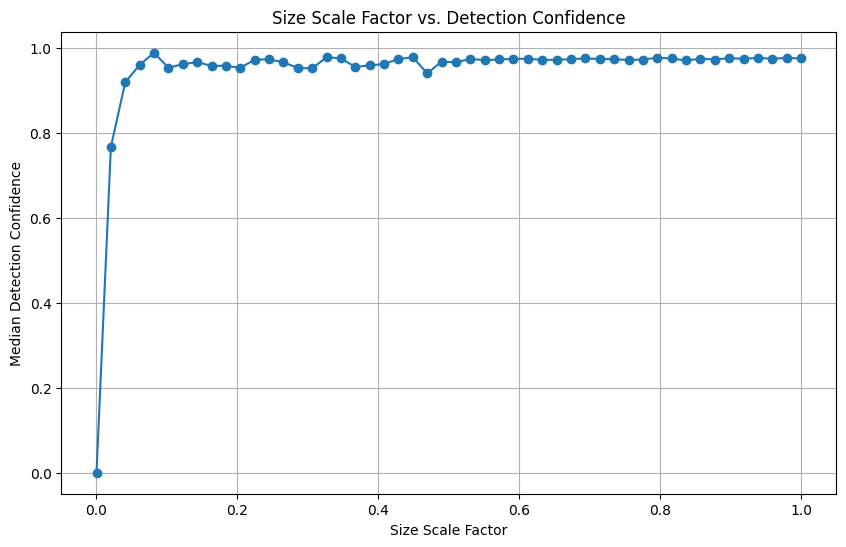

In [37]:
img_path = "Pictures/bermuda.jpg"
ot.set_image(img_path)
ot.size_experiment(scales = np.linspace(0.001, 1.0, 50))

### Observation:
The plot shows the maximum median detection confidence around scale factor of 0.08.
The plot also shows that the median detection confidence quickly decreases if the image is resized even smaller. Below the scale factor of 0.02, the model fails to detect any object with high confidence.

## Effect of Gaussian Noise on Detection Confidence

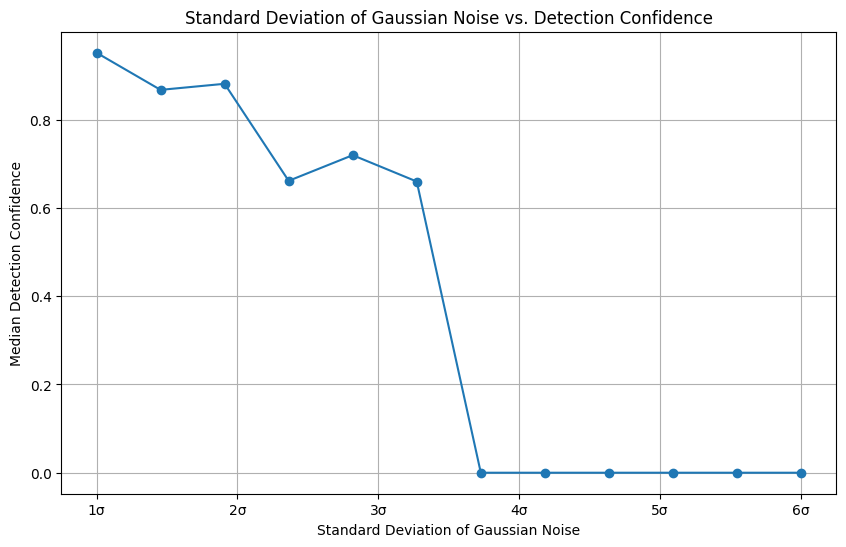

In [38]:
ot.noise_experiment(noise_type='gaussian', std_scales=np.linspace(1, 6, 12))

### Observation:
The plot above shows that applying any amount of gaussian noise on an image hurts the model.
It also shows that past 3σ, the model did not detect any object with high confidence. Which supports the rule of thumb to not choose standard deviation values that are greater than 3σ for gaussian filters.

## Effect of Salt and Pepper Noise on Detection Confidence

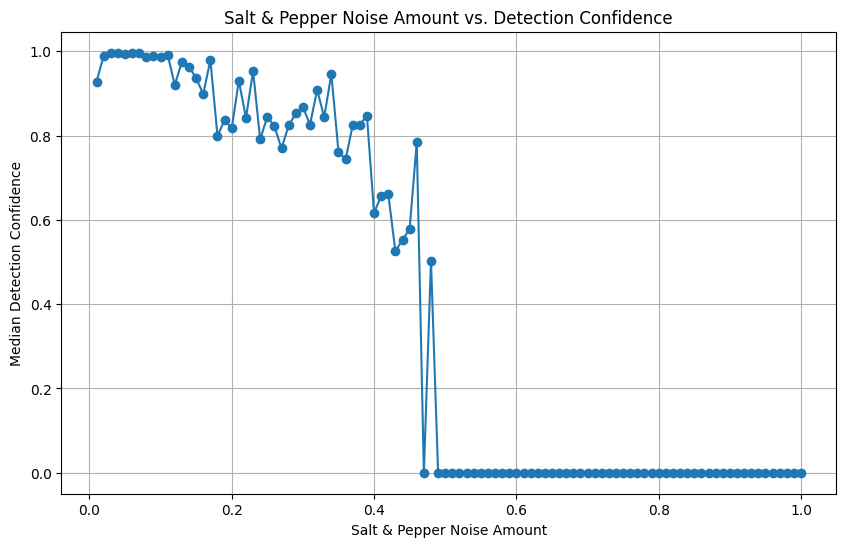

In [39]:
ot.noise_experiment(noise_type='sp', std_scales=np.linspace(0.01, 1, 100))

### Observation:
From the plot above we can see that the model improved when low amount of s&p noise was added.
We can also see that around 0.5 noise probability, the model fails to detect any object with high confidence.

## Effect of Rotation on Detection Confidence


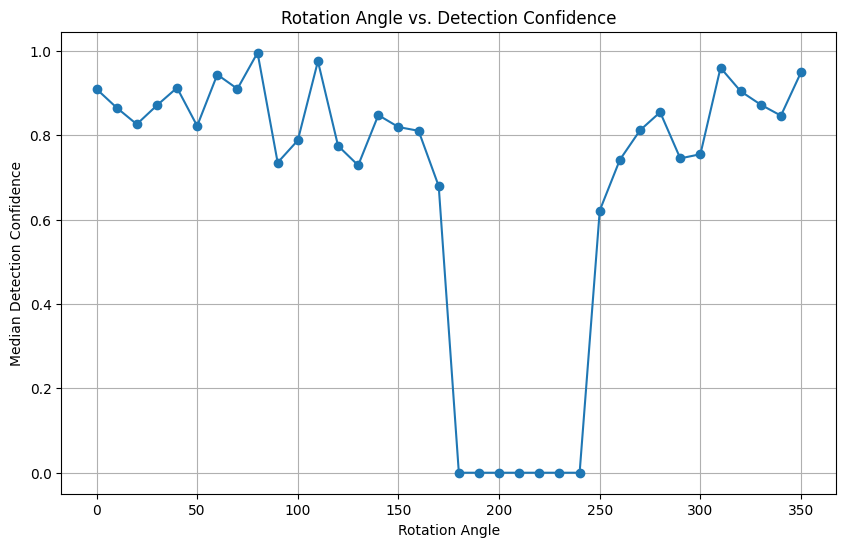

In [40]:
ot.rotation_experiment(angles=range(0, 360, 10))

From the plot above, some median detection confidence values are higher when the image is rotated(60', 120', 310') versus not rotated(angle = 0'). This tells us rotation does help the model in certain cases. The plot also shows that when an image is rotated by 160'-250' degrees (when the image is flipped or almost flipped) the model performs poorly. This tells us that maybe the model is trained on images that were slightly rotated but not fully rotated (180').

## Conclusion
There is an improvement (in some instances) in median detection confidence when the image is augmented using resize, rotation and salt & pepper noise. Surprisingly, the model perform worse when gaussian noise is applied to the image. 

___
**Reference:** geeksforgeeks.org